In [87]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import statsmodels.api as sm

## Model evaluation
from sklearn.metrics import plot_confusion_matrix, precision_score , recall_score, f1_score , accuracy_score
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.rcParams["font.size"] = 15
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
# tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
#                   png_file_to_save='../../img/topic3_decision_tree1.png')

In [14]:
train_LR = pd.read_csv(r"../Data/PreparedData/train_logistic.csv")
test_LR = pd.read_csv(r"../Data/PreparedData/test_logistic.csv")

In [61]:
submit_temp = pd.read_csv(r"../Data/gender_submission.csv")

## Logistic Regression

In [15]:
X_lr = train_LR.drop(["Survived"] , axis = 1)
y_lr = train_LR["Survived"]

In [27]:
logit_model = sm.Logit( y_lr, X_lr)
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.450905
         Iterations 9


In [34]:
print(results.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.323     
Dependent Variable: Survived         AIC:              817.5118  
Date:               2020-09-25 21:52 BIC:              851.0582  
No. Observations:   891              Log-Likelihood:   -401.76   
Df Model:           6                LL-Null:          -593.33   
Df Residuals:       884              LLR p-value:      1.1740e-79
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass       -0.6158    0.0873   -7.0542  0.0000  -0.7869  -0.4447
Sex          -2.1253    0.1968  -10.8000  0.0000  -2.5110  -1.7396
Age          -0.3413    0.1127   -3.0285  0.0025  -0.5622  -0.1204
Fare          0.2949    0.1006

In [16]:
x_train, x_test , y_train, y_test = train_test_split(X_lr , y_lr , test_size = 0.3, random_state = 42)

In [18]:
LR = LogisticRegression(n_jobs= -1)
LR.fit(x_train , y_train)

LogisticRegression(n_jobs=-1)

In [21]:
accuracy_score(y_test , LR.predict(x_test))

0.7947761194029851

In [22]:
f1_score(y_test ,LR.predict(x_test) )

0.7488584474885844

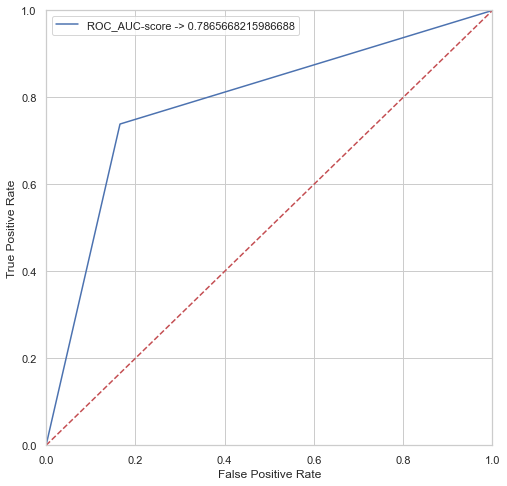

In [56]:
logit_roc_auc = roc_auc_score(y_test , LR.predict(x_test))
fpr, tpr , threshold= roc_curve(y_test , LR.predict(x_test))
plt.figure(figsize = (8 , 8))
plt.plot(fpr, tpr , label = f"ROC_AUC-score -> {logit_roc_auc}")
plt.plot([0,1] , [0,1] , "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0,1)
plt.ylim(0, 1)
plt.legend()

In [58]:
## lets see predictions of our Logistic Regression
test_pred = LR.predict(test_LR)

In [62]:
submit_temp.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [63]:
test_pred = pd.DataFrame({"Survived" : test_pred})
submitdf = pd.concat([submit_temp["PassengerId"] , test_pred] , axis = 1)

In [64]:
submitdf.to_csv(r"../Data/PredictedData/LR_base.csv" , index = False)

In [65]:
## Let's get started the party.

In [70]:
train = pd.read_csv(r"../Data/PreparedData/train.csv")
test = pd.read_csv(r"../Data/PreparedData/test.csv")

In [73]:
X = train.drop(["Survived"] , axis = 1)
y = train["Survived"]

In [74]:
x_train , x_test , y_train ,y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [66]:
## Dtree_base

In [75]:
Dtree_base = DecisionTreeClassifier(criterion = "entropy" , random_state = 42) 
Dtree_base.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [76]:
accuracy_score(y_test , Dtree_base.predict(x_test))

0.7947761194029851

In [77]:
f1_score(y_test , Dtree_base.predict(x_test))

0.7441860465116278

### Dtree on test data

In [80]:
test_pred = Dtree_base.predict(test)
test_pred = pd.DataFrame({"Survived" : test_pred})
submitdf = pd.concat([submit_temp["PassengerId"] , test_pred] , axis = 1)
submitdf.to_csv(r"../Data/PredictedData/Dtree_base.csv" , index = False)

## Dtree_grid

In [83]:
Dtree = DecisionTreeClassifier(criterion = "entropy")
Dtree_params = {"max_depth" : range(2, 20) , "max_features" : range(2 , 10) , "min_samples_leaf" : range(1 , 50)}

dtree_grid = GridSearchCV(Dtree , Dtree_params , cv = 20 , n_jobs = -1 , verbose = 2)
dtree_grid.fit(x_train , y_train)

Fitting 20 folds for each of 7056 candidates, totalling 141120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 22960 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 37200 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 54064 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 73488 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 95536 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120144 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 141120 out of 141120 | elapsed:  2.3min finished


GridSearchCV(cv=20, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 20),
                         'max_features': range(2, 10),
                         'min_samples_leaf': range(1, 50)},
             verbose=2)

In [84]:
dtree_grid.best_score_

0.8508064516129032

In [85]:
dtree_grid.best_params_

{'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 9}

In [86]:
accuracy_score(y_test , dtree_grid.predict(x_test))

0.8059701492537313

In [91]:
tree_graph_to_png(tree=dtree_grid.best_estimator_, feature_names=X.columns ,
                  png_file_to_save='../Tree_graph//dtree_base.png')


### Dtree_grid on test_data

In [92]:
test_pred = dtree_grid.predict(test)
test_pred = pd.DataFrame({"Survived" : test_pred})
submitdf = pd.concat([submit_temp["PassengerId"] , test_pred] , axis = 1)
submitdf.to_csv(r"../Data/PredictedData/Dtree_grid.csv" , index = False)

In [ ]:
## now apply random_Forest

## RF_base

In [94]:
RF_base = RandomForestClassifier(criterion = "entropy")
RF_base.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy')

In [95]:
accuracy_score(y_test , RF_base.predict(x_test))

0.8246268656716418

In [96]:
f1_score(y_test , RF_base.predict(x_test))

0.7853881278538812

In [104]:
test_pred = RF_base.predict(test)
test_pred = pd.DataFrame({"Survived" : test_pred})
submitdf = pd.concat([submit_temp["PassengerId"] , test_pred] , axis = 1)
submitdf.to_csv(r"../Data/PredictedData/RF_base.csv" , index = False)

## RF_grid

In [97]:
RF = RandomForestClassifier(criterion = "entropy" , random_state=42)
RF_params = {"max_depth" : range(2, 20) , "max_features" : range(2 , 10) , "min_samples_leaf" : range(1 , 50)}

RF_grid = GridSearchCV(RF , RF_params , cv = 20 , n_jobs = -1 , verbose = 2)
RF_grid.fit(x_train , y_train)

Fitting 20 folds for each of 7056 candidates, totalling 141120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 7738 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 9924 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 12274 tasks      | 

GridSearchCV(cv=20,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 20),
                         'max_features': range(2, 10),
                         'min_samples_leaf': range(1, 50)},
             verbose=2)

In [100]:
accuracy_score(y_test , RF_grid.predict(x_test))

0.8208955223880597

In [101]:
f1_score(y_test , RF_grid.predict(x_test))

0.76

### RF_grid on test_data

In [105]:
test_pred = RF_grid.predict(test)
test_pred = pd.DataFrame({"Survived" : test_pred})
submitdf = pd.concat([submit_temp["PassengerId"] , test_pred] , axis = 1)
submitdf.to_csv(r"../Data/PredictedData/RF_grid.csv" , index = False)